# 3D CNN rs-fMRI

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd '/content/drive/MyDrive/Colab Notebooks'

/content/drive/MyDrive/Colab Notebooks


In [ ]:
# Unzip file containing all training and validation images
from zipfile import ZipFile
file_name = "SPM_Estimation_Normalised_Labeld.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [ ]:
import tensorflow as tf
import numpy as np 
import os
import nibabel as nib
import scipy
import keras
import sklearn
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
main_path = "/content/drive/MyDrive/Colab Notebooks"
train_path = os.path.join(main_path,"SPM_Estimation_Normalised_Labeld")
train_network1 = glob.glob(train_path+"/Network1/*.nii")
train_network2 = glob.glob(train_path+"/Network2/*.nii")
train_network3 = glob.glob(train_path+"/Network3/*.nii")
train_network4 = glob.glob(train_path+"/Network4/*.nii")
train_network5 = glob.glob(train_path+"/Network5/*.nii")

In [ ]:
#Train list:
train_list = [x for x in train_network1]
train_list.extend([x for x in train_network2])
train_list.extend([x for x in train_network3])
train_list.extend([x for x in train_network4])
train_list.extend([x for x in train_network5])
df_train = pd.DataFrame(np.concatenate([
    ['1']*len(train_network1),
    ['2']*len(train_network2),
    ['3']*len(train_network3),
    ['4']*len(train_network4),
    ['5']*len(train_network5),]),
    columns = ['label'])
df_train['image'] = [x for x in train_list]

In [ ]:
df_train

,label,image
0,1,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
1,1,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
2,1,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
3,1,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
4,1,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
...,...,...
2995,5,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
2996,5,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
2997,5,/content/drive/MyDrive/Colab Notebooks/SPM_Est...
2998,5,/content/drive/MyDrive/Colab Notebooks/SPM_Est...


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


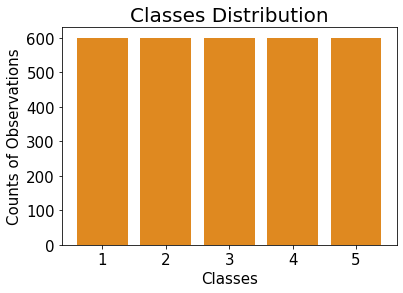

In [ ]:
sns.countplot(df_train['label'], color='darkorange')
plt.title('Classes Distribution', fontsize=20)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('Counts of Observations', fontsize=15);
plt.tick_params(labelsize=15)
plt.plot (label='Seaborn')
sns.set(rc={"figure.figsize":(7, 3)})

In [ ]:
import nibabel as nib

from scipy import ndimage

def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/SPM_Estimation_Normalised_Labeld'
img_list = list(df_train['image'])
data_img = []

for each in img_list:
  #Each image path:
  each_path = os.path.join(path, each)
  each_img = read_nifti_file(each_path)
  data_img.append(each_img)

# Converting list to numpy array
X = np.array(data_img)

In [ ]:
print('Shape of X: ', X.shape)

Shape of X:  (3000, 61, 73, 61)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y = OneHotEncoder(dtype='int8', sparse=False).fit_transform(df_train['label'].values.reshape(-1,1))

In [ ]:
print('Shape of y: ', y.shape)

Shape of y:  (3000, 5)


In [ ]:
labels = df_train['label'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_data, X_test, y_data, y_test = train_test_split(X, labels, test_size=0.2500, random_state=0, stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.3333, random_state=0, stratify=y_data)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


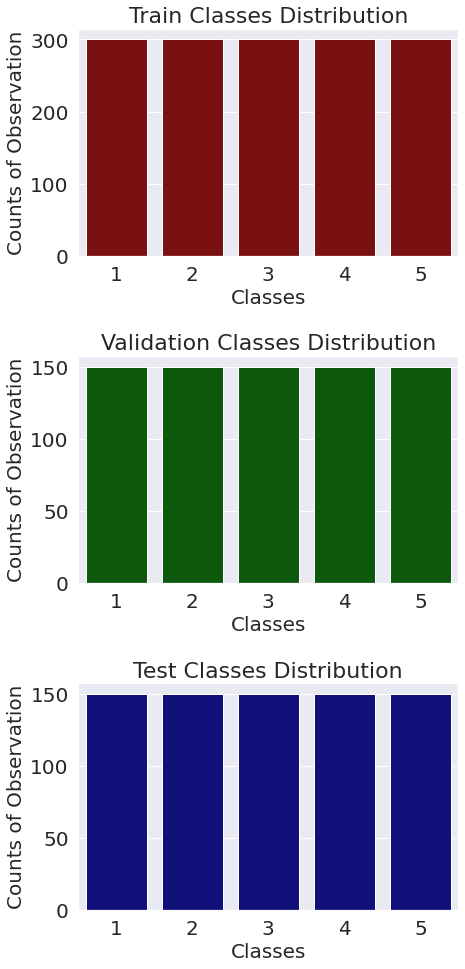

In [ ]:
list_classes = ['1', '2', '3', '4', '5']
fig, ax = plt.subplots(3, 1, figsize=(7,14))
sns.countplot(y_train, ax = ax[0],  color='darkred', order=list_classes)
ax[0].set_title("Train Classes Distribution", fontsize=22)
ax[0].set_xlabel('Classes', fontsize=20)
ax[0].set_ylabel('Counts of Observation', fontsize=20)
ax[0].tick_params(axis="x", labelsize=20)
ax[0].tick_params(axis="y", labelsize=20)
sns.countplot(y_val, ax = ax[1], color='darkgreen', order=list_classes)
ax[1].set_title("Validation Classes Distribution", fontsize=22)
ax[1].set_xlabel('Classes', fontsize=20)
ax[1].set_ylabel('Counts of Observation', fontsize=20)
ax[1].tick_params(axis="x", labelsize=20)
ax[1].tick_params(axis="y", labelsize=20)
sns.countplot(y_test, ax = ax[2], color='darkblue', order=list_classes)
ax[2].set_title("Test Classes Distribution", fontsize=22)
ax[2].set_xlabel('Classes', fontsize=20)
ax[2].set_ylabel('Counts of Observation', fontsize=20)
ax[2].tick_params(axis="x", labelsize=20)
ax[2].tick_params(axis="y", labelsize=20)
fig.tight_layout(pad=2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_train = OneHotEncoder(dtype='int8', sparse=False).fit_transform(y_train.reshape(-1,1))
y_val = OneHotEncoder(dtype='int8', sparse=False).fit_transform(y_val.reshape(-1,1))
y_test = OneHotEncoder(dtype='int8', sparse=False).fit_transform(y_test.reshape(-1,1))

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)
X_val, y_val = shuffle(X_val, y_val)
X_test, y_test = shuffle(X_test, y_test)

In [ ]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
for train_index, remain_index in kf.split(X,labels):
    (X_train, labels_train) = (X[train_index], labels[train_index])
    (X_remain, labels_remain) = (X[remain_index], labels[remain_index])
for val_index, test_index in kf.split(X_remain,labels_remain):
    (X_val, labels_val) = (X_remain[val_index], labels_remain[val_index])
    (X_test, labels_test) = (X_remain[test_index], labels_remain[test_index])
y_train = OneHotEncoder(dtype='int8', sparse=False).fit_transform(labels_train.reshape(-1,1))
y_val = OneHotEncoder(dtype='int8', sparse=False).fit_transform(labels_val.reshape(-1,1))
y_test = OneHotEncoder(dtype='int8', sparse=False).fit_transform(labels_test.reshape(-1,1))

In [ ]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_val shape  : ', X_val.shape)
print('y_val shape  : ', y_val.shape)
print('X_test shape : ', X_test.shape)
print('y_test shape : ', y_test.shape)

X_train shape:  (1500, 61, 73, 61)
y_train shape:  (1500, 5)
X_val shape  :  (750, 61, 73, 61)
y_val shape  :  (750, 5)
X_test shape :  (750, 61, 73, 61)
y_test shape :  (750, 5)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(width=61, height=73, depth=61):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((width wit, a, height, depth,1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="LeakyReLU")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="LeakyReLU")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="LeakyReLU")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x) 
    x = layers.Dropout(0.4)(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=128, activation="LeakyReLU")(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(units=5, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3dcnn")
    return model


# Build model.
model = get_model(width=61, height=73, depth=61)
model.summary()

Model: "3dcnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 61, 73, 61, 1)]   0         
                                                                 
 conv3d_63 (Conv3D)          (None, 59, 71, 59, 64)    1792      
                                                                 
 max_pooling3d_63 (MaxPoolin  (None, 29, 35, 29, 64)   0         
 g3D)                                                            
                                                                 
 batch_normalization_63 (Bat  (None, 29, 35, 29, 64)   256       
 chNormalization)                                                
                                                                 
 dropout_84 (Dropout)        (None, 29, 35, 29, 64)    0         
                                                                 
 conv3d_64 (Conv3D)          (None, 27, 33, 27, 64)    110656

In [ ]:
# Compile model.
from keras.optimizers import Adam
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0001),
    metrics=["acc"],run_eagerly=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_val, y_val))

In [ ]:
history_df = pd.DataFrame(history.history)
fig, ax = plt.subplots(2, 1, figsize=(7,9))

plt.subplot(2,1,1)
plt.plot(history_df['loss'], label='Training Loss', color='darkred')
plt.plot(history_df['val_loss'], label='Validation Loss',color='darkgreen')
plt.title('Model Loss', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.legend(fontsize=16)

plt.subplot(2,1,2)
plt.plot(history_df['acc'], label='Training Accuracy',color='darkred')
plt.plot(history_df['val_acc'], label='Validation Accuracy',color='darkgreen')
plt.title('Model Accuracy', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.legend(fontsize=16)
fig.tight_layout(pad=2)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting labels from X_test data
y_pred = model.predict(X_test)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test labels from one hot encoding to list
y_test_classes = np.argmax(y_test, axis = 1)
# Create the confusion matrix

list_classes = ['SMN', 'CON', 'DMN', 'FPN', 'SN']

confmx = confusion_matrix(y_test_classes, y_pred_classes)
f, ax = plt.subplots(figsize = (8,8))
sns.set(font_scale=1.1)
sns.heatmap(confmx, annot=True, fmt='.1f', ax = ax, cmap="seismic", linecolor='white', xticklabels=list_classes, yticklabels=list_classes)
plt.xlabel('Predicted Classes', fontsize=20)
plt.ylabel('True Classes', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show();

In [ ]:
print(classification_report(y_test_classes, y_pred_classes))

In [ ]:
test_loss = model.evaluate(X_test, y_test)

24/24 [==============================] - 1s 48ms/step - loss: 1.9391 - acc: 0.3920


In [ ]:
test_loss = model.evaluate(X_val, y_val)

24/24 [==============================] - 1s 47ms/step - loss: 1.9562 - acc: 0.4067


In [ ]:
test_loss = model.evaluate(X_train, y_train)

47/47 [==============================] - 2s 48ms/step - loss: 1.9192 - acc: 0.4453


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

target= ['SMN', 'CON', 'DMN', 'FPN', 'SN']
colors=['darkred','darkorange','darkgreen','darkcyan','darkmagenta']
# set plot figure size
fig, c_ax = plt.subplots(1,1, figsize = (10, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro", multi_class="ovr"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx], drop_intermediate=False)
        c_ax.plot(fpr, tpr,color=colors[idx], label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'darkblue', label = 'Random Classifier')
    return roc_auc_score(y_test, y_pred, average=average, multi_class="ovr")


print('ROC AUC score:', multiclass_roc_auc_score(y_test, y_pred_classes))

c_ax.legend(fontsize=18)
c_ax.set_xlabel('False Positive Rate', fontsize=18)
c_ax.set_ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curves', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

In [ ]:
# Unzip file containing testing images
from zipfile import ZipFile
file_name = "HL_Test_1.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()

In [ ]:
main_path_hl = "/content/drive/MyDrive/Colab Notebooks"
test_path_hl = os.path.join(main_path_hl,"HL_Test_1")
test_network1_hl = glob.glob(test_path_hl+"/Network1/*.nii")
test_network2_hl = glob.glob(test_path_hl+"/Network2/*.nii")
test_network3_hl = glob.glob(test_path_hl+"/Network3/*.nii")
test_network4_hl = glob.glob(test_path_hl+"/Network4/*.nii")
test_network5_hl = glob.glob(test_path_hl+"/Network5/*.nii")

In [ ]:
#Train list:
test_list_hl = [x for x in test_network1_hl]
test_list_hl.extend([x for x in test_network2_hl])
test_list_hl.extend([x for x in test_network3_hl])
test_list_hl.extend([x for x in test_network4_hl])
test_list_hl.extend([x for x in test_network5_hl])
df_test_hl = pd.DataFrame(np.concatenate([
    ['1']*len(test_network1_hl),
    ['2']*len(test_network2_hl),
    ['3']*len(test_network3_hl),
    ['4']*len(test_network4_hl),
    ['5']*len(test_network5_hl),]),
    columns = ['label'])
df_test_hl['image'] = [x for x in test_list_hl]

In [ ]:
df_test_hl

In [ ]:
def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 61
    desired_width = 61
    desired_height = 73
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = resize_volume(volume)
    return volume

In [ ]:
path_test = '/content/drive/MyDrive/Colab Notebooks/HL_Test_1'
img_list_test = list(df_test_hl['image'])
data_img_test = []

for each_test in img_list_test:
  #Each image path:
  each_path_test = os.path.join(path_test, each_test)
  each_img_test = process_scan(each_path_test)
  data_img_test.append(each_img_test)

# Converting list to numpy array
X_test_hl = np.array(data_img_test)

In [ ]:
print('Shape of X: ', X_test_hl.shape)

Shape of X:  (750, 61, 73, 61)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
y_test_hl = OneHotEncoder(dtype='int8', sparse=False).fit_transform(df_test_hl['label'].values.reshape(-1,1))

In [ ]:
print('Shape of y: ', y_test_hl.shape)

Shape of y:  (750, 5)


In [ ]:
labels_test_hl = df_test_hl['label'].values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting labels from X_test data
y_pred_hl = model.predict(X_test_hl)
# Converting prediction classes from one hot encoding to list
# Argmax returns the position of the largest value
y_pred_classes_hl = np.argmax(y_pred_hl, axis = 1)
print(pred_classes_hl)